<a href="https://colab.research.google.com/github/NeginKhalifat/TensorFlow_PracticeNotes/blob/main/1_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

we want to classify breast cancer to

1.   melignant
2.   benign



In [ ]:
import tensorflow as tf

# Reading Data:

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


# Split Data:

In [ ]:
X = data.data
y=data.target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=.33)

# Scale Data:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Create model

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, activation='sigmoid',input_shape=(X_train.shape[1],))
])

# Compile model



*   Optimizers:
            tf.keras.optimizers




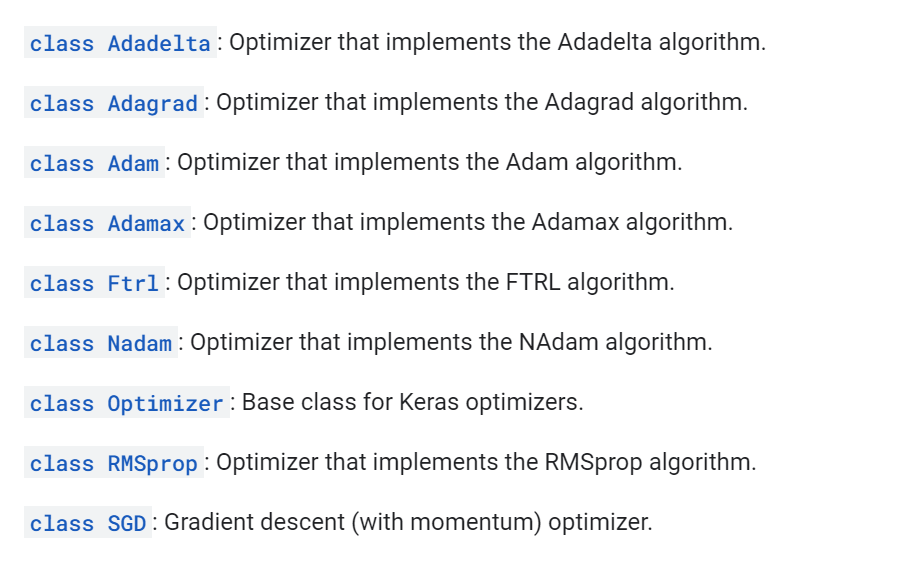



*   Metrices:
          sklearn.metrices




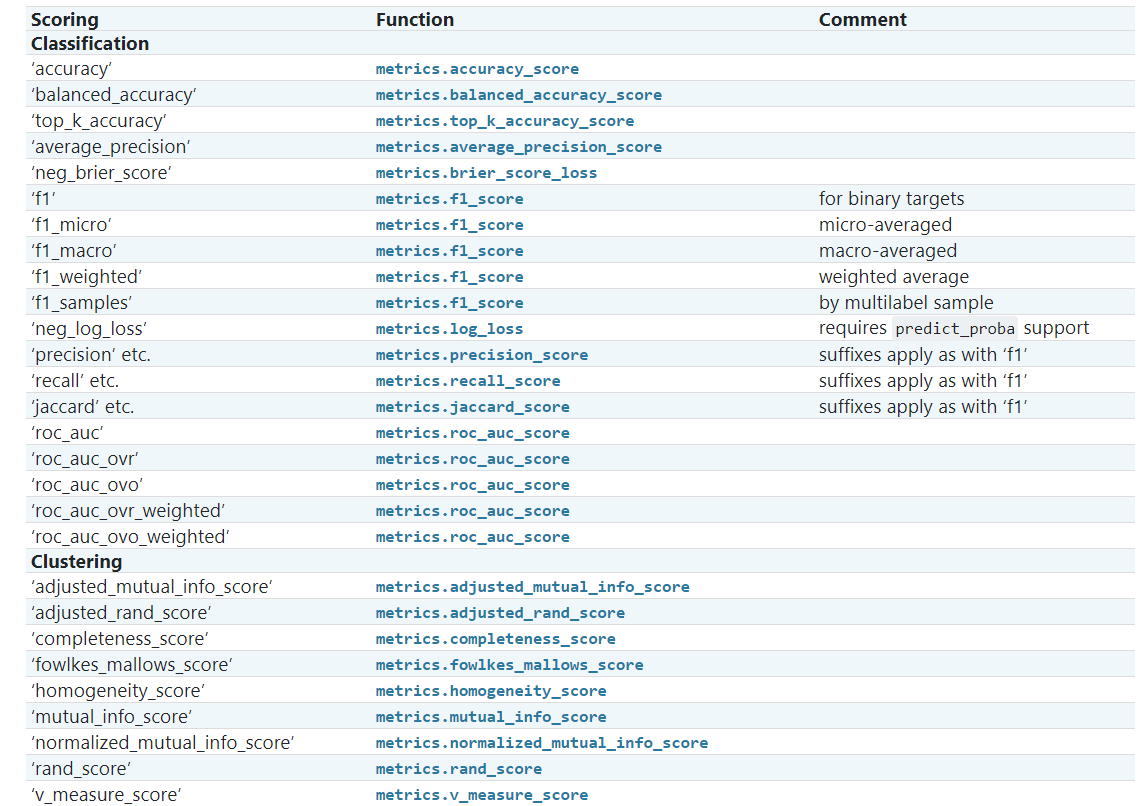

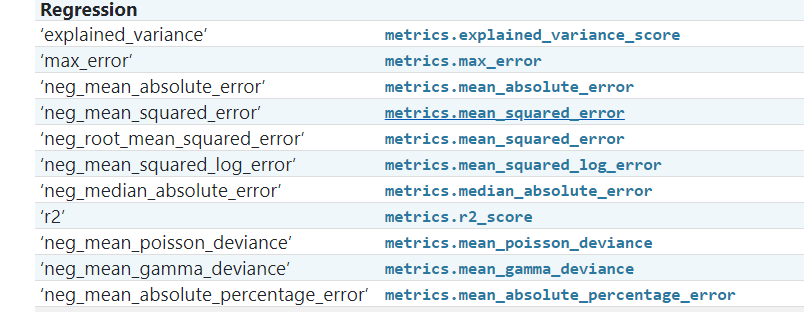



*   Loss:

        tf.keras.losses


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
r = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 217.7544 - accuracy: 0.6231 - val_loss: 192.7376 - val_accuracy: 0.6436
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 194.2857 - accuracy: 0.6354 - val_loss: 180.9520 - val_accuracy: 0.6436
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 219.7803 - accuracy: 0.5630 - val_loss: 169.0433 - val_accuracy: 0.6436
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 172.4341 - accuracy: 0.6436 - val_loss: 157.5025 - val_accuracy: 0.6436
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 159.8312 - accuracy: 0.6257 - val_loss: 145.8160 - val_accuracy: 0.6436
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 140.3815 - accuracy: 0.6420 - val_loss: 133.9204 - val_accuracy: 0.6436
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 131.8381 - accuracy: 0.6371 - val_loss: 122.1837 - val_a

In [ ]:
print("Train Score",model.evaluate(X_train,y_train))
print("Test Score",model.evaluate(X_test,y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.9200 - accuracy: 0.8793
Train Score [0.919956624507904, 0.8792650699615479]
6/6 [==============================] - 0s 3ms/step - loss: 0.2959 - accuracy: 0.9255
Test Score [0.2959221303462982, 0.9255319237709045]


# Plot:

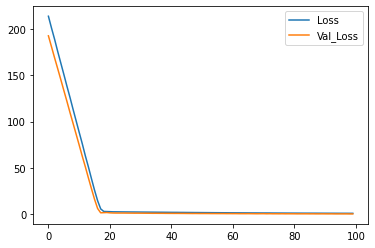

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='Loss')
plt.plot(r.history['val_loss'],label='Val_Loss')
plt.legend()

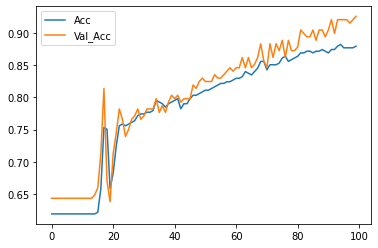

In [ ]:
plt.plot(r.history['accuracy'],label='Acc')
plt.plot(r.history['val_accuracy'],label='Val_Acc')
plt.legend()